# Appendix: Statistical distributions

# A quick note about the difference between 'import', 'from' + 'import' and 'from libraryname.submodule'

- Use *import* when you want to use the whole library.

- Use *from* + *import* when you want to use a specific member of the library.

In [4]:
# Examples:
#1
import datetime
date1 = datetime.date(2022, 7, 6)
print(date1)
from datetime import date
date2 = date(2022, 7, 7)
print(date2)

2022-07-06
2022-07-07


- You can import a submodule of a library as in the case of *import matplotlib.pyplot as plt*

- if you import the whole *matplotlib* library, then you have to specify the submodule and then the function *plot()*:


``` python 
import matplotlib as mpl
mpl.pyplot.plot(...)
        ```



# These are examples taken from Kenett et al....

## Have a look at them in the textbook I shared

In [5]:
#Binomial values
from scipy.stats import binom
import numpy as np
X = binom.rvs(1, 0.9, size=50)
print(X)


[1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1]


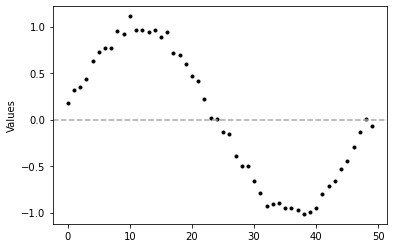

In [14]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
# create a list of 50 values forming a sine curve
x = [math.sin(x * 2 * math.pi / 50) for x in range(1, 51)]
# Add a random normal with mean 0 and standard deviation 0.05
x = [xi + norm.rvs(loc=0, scale=0.05) for xi in x]
ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values')
ax.axhline(y=0, linestyle='--', color='darkgray')
plt.show()


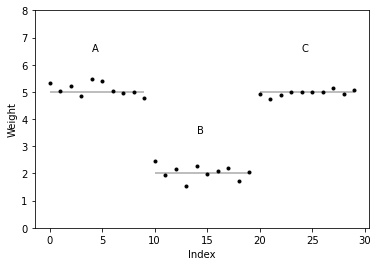

In [15]:
#Simulations of measurements
import numpy as np
x = np.concatenate([5 + norm.rvs(loc=0, scale=0.5, size=10),
                    2 + norm.rvs(loc=0, scale=0.2, size=10),
                    5 + norm.rvs(loc=0, scale=0.1, size=10)])
ax = pd.Series(x).plot(style='.', color='black')
ax.set_ylabel('Values')
ax.set_xlabel('Index')
ax.set_ylabel('Weight')
ax.hlines(y=5, xmin=0, xmax=9, color='darkgray')
ax.hlines(y=2, xmin=10, xmax=19, color='darkgray')
ax.hlines(y=5, xmin=20, xmax=29, color='darkgray')
ax.text(4, 6.5, 'A')
ax.text(14, 3.5, 'B')
ax.text(24, 6.5, 'C')
ax.set_ylim(0, 8)
plt.show()

In [17]:
#Hypergeometric distribution
from scipy import stats
x = list(range(0, 8))
rv = stats.hypergeom(M=75, n=15, N=10)
df = pd.DataFrame({
     'j': x,
    'h': rv.pmf(x),
    'H': rv.cdf(x),
})

In [18]:
df

,j,h,H
0,0,0.090953,0.090953
1,1,0.267510,0.358463
2,2,0.324098,0.682561
3,3,0.211989,0.894550
4,4,0.082440,0.976990
5,5,0.019786,0.996776
6,6,0.002944,0.999720
7,7,0.000266,0.999986


In [23]:
#Poisson distribution
from scipy import stats
x = list(range(0, 5))
rv = stats.poisson(5)
df = pd.DataFrame({
     'j': x,
    'h': rv.pmf(x),
    'H': rv.cdf(x),
})

In [24]:
df

,j,h,H
0,0,0.006738,0.006738
1,1,0.033690,0.040428
2,2,0.084224,0.124652
3,3,0.140374,0.265026
4,4,0.175467,0.440493


# Refer to the scipy website for other distributions

## https://scipy.org

# Resampling Methods



## Resampling methods are simulation methods in the field of computational statistics:
   
   

- In general, in resampling methods sample data are the **only source of information about the population**.


- **No assumptions** or guess **about the population** are available. 


- They involve repeatedly sampling (i.i.d. in most cases) from a training set and <u>fitting a model of interest or a statistic on each sample</u> in order to obtain additional information about the population parameters. 


- Resampling methods are a **class of Monte Carlo methods** and are generally considered computer intensive.


# An important example: the standard bootstrap
   
1. The bootstrap is a statistical method originally proposed to evaluate the *accuracy* of an estimator (i.e. its precision) for a parameter of interest. 


2. In a non-parametric context the (classical) bootstrap methodology is based on the fact that the empirical distribution function (EDF) $\hat{F}$ is a **good estimate of the underlying and unknown distribution function** $F$ from which an independent and identically (iid) $n$-sized sample is drawn.


3. The EDF puts mass $1/n$ on each element $X_i$ of the sample. 


4. $\hat{F}$ is the 'population' under which we can simulate the distribution of a particular statistic $\hat{\theta} (F)$.


5. Ideally, all the possible $n$-sized samples under $\hat{F}$ should be computed and all the values corresponding to the above statistic should be calculated. In this way an 'ideal' bootstrap estimate is produced. 


6. But this is impossible to obtain and we rely on a bootstrap estimate obtained by repeatedly resampling *many times* the original sample in order to *mimic* the sampling variability.


# EDF: formal definition and example
   
- Formally, the EDF is defined as follows:

 $$
 \hat{F}_n(t)=\frac{\text{number of elements in the sample} \leq t}{n}= \frac{1}{n} \sum_{i=1}^n \mathbb{1} \{x_i \leq t \}.
 $$ 
 
- Example data: elbow measurements of 247 phisically active men taken from Heinz, G., Peterson, L.J., Johnson, R.W. and Kerk, C.J. (2003). Exploring Relationships in Body Dimensions. *Journal of Statistics Education*, 11(2): 1-10.


- Data set: 'body.dat.txt'.


- Data description: 'body.txt'.
 


In [21]:
import numpy as np
import pandas as pd
#Read the txt file
columns = ['Biacromial_diam', 'Biiliac_diam','Bitrochanteric_diam',
           'Chest_depth','Chest_diam','Elbow_lgth','Wrist_diam','Knee_diam',
           'Ankle_diam','Shoulder_girth','Chest_girth','Waist_girth','Navel_girth',
           'Hip_girth','Thigh_girth','Bicep_girth','Forearm_girth','Knee_girth',
           'Calf_max_girth','Ankle_min_girth','Wrist_min_girth','Age','Weight',
           'Height','Gender']
elbow_data = pd.read_csv('body.dat.txt', sep="\t", header=None, names = columns)
#elbow_data = pd.read_csv('body.dat.txt', sep="\t",  usecols=[0,1])

elbow_data.columns 

Index(['Biacromial_diam', 'Biiliac_diam', 'Bitrochanteric_diam', 'Chest_depth',
       'Chest_diam', 'Elbow_lgth', 'Wrist_diam', 'Knee_diam', 'Ankle_diam',
       'Shoulder_girth', 'Chest_girth', 'Waist_girth', 'Navel_girth',
       'Hip_girth', 'Thigh_girth', 'Bicep_girth', 'Forearm_girth',
       'Knee_girth', 'Calf_max_girth', 'Ankle_min_girth', 'Wrist_min_girth',
       'Age', 'Weight', 'Height', 'Gender'],
      dtype='object')

In [22]:
#6th column is the sum length of the two elbows
elbow_data

,Biacromial_diam,Biiliac_diam,Bitrochanteric_diam,Chest_depth,Chest_diam,Elbow_lgth,Wrist_diam,Knee_diam,Ankle_diam,Shoulder_girth,...,Bicep_girth,Forearm_girth,Knee_girth,Calf_max_girth,Ankle_min_girth,Wrist_min_girth,Age,Weight,Height,Gender
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
503,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
504,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
505,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0


In [24]:
elbow_data['Gender']
elbow_data_males = elbow_data.loc[elbow_data['Gender'] == 1]

14.457085020242925
0.8825432143881122


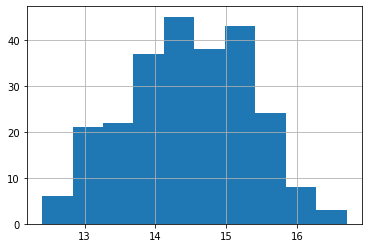

In [26]:
#elbow_data_males = elbow_data.loc[elbow_data['Gender'] == 1]
#histogram + mean and std:
hist = elbow_data_males['Elbow_lgth'].hist(bins=10)
mean_elbow = elbow_data_males['Elbow_lgth'].mean()
sd_elbow = elbow_data_males['Elbow_lgth'].std()
print(mean_elbow)
print(sd_elbow)

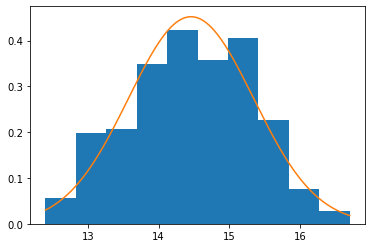

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#histogram + normal superimposed
x = np.linspace(elbow_data_males['Elbow_lgth'].min(), elbow_data_males['Elbow_lgth'].max(), 1000)
plt.hist(elbow_data_males['Elbow_lgth'], density = True, bins=10 ) # plotting histogram 
plt.plot(x, stats.norm.pdf(x, mean_elbow, sd_elbow))
plt.show() 

In [28]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
n = stats.norm(loc=mean_elbow, scale=sd_elbow)

In [29]:
import numpy as np

def ecdf(sample):

    # convert sample to a numpy array, if it isn't already
    sample = np.atleast_1d(sample)

    # find the unique values and their corresponding counts
    quantiles, counts = np.unique(sample, return_counts=True)

    # take the cumulative sum of the counts and divide by the sample size to
    # get the cumulative probabilities between 0 and 1
    cumprob = np.cumsum(counts).astype(np.double) / sample.size

    return quantiles, cumprob

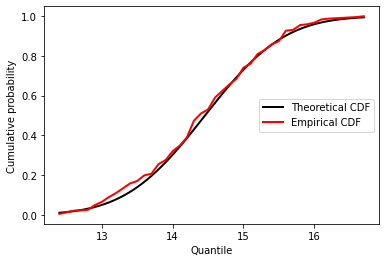

In [30]:
qe, pe = ecdf(elbow_data_males['Elbow_lgth'])
q = np.linspace(elbow_data_males['Elbow_lgth'].min(), elbow_data_males['Elbow_lgth'].max(), 1000)
p = n.cdf(q)
# plot
fig, ax = plt.subplots(1, 1)
ax.plot(q, p, '-k', lw=2, label='Theoretical CDF')
ax.plot(qe, pe, '-r', lw=2, label='Empirical CDF')
ax.set_xlabel('Quantile')
ax.set_ylabel('Cumulative probability')
ax.legend(fancybox=True, loc='right')
plt.show()

# Generalities on the standard bootstrap
   
- The parameter (or the parameters) $\theta$ of interest can be considered as a functional $\theta(F)$ of the underlying distribution. 


- For example, the mean is such that $\mu=\mu(F)=\int x dF(x)=\int x f(x)dx$ ($f(x)$ is the density function), or the median is such that $Me= F^{-1}(0.5)$.


- In its original formulation, the bootstrap aims at solving problems of **non-parametric estimation** to evaluate the **adequacy/precision of an estimator**. 


- Its two basic principles are:
    - The *plug-in principle*, which substitutes the CDF with the ECDF and uses estimators having similar forms with respect to the parameters. 
    - The *Monte Carlo principle*, which repeatedly simulates using a computer program. 


- The plug-in principle then uses the estimator $\theta(\hat{F})$ instead of $\theta(F)$.



# Generalities on the standard bootstrap (cont'd)
   
- The sample mean is a typical application of the plug-in principle: we know that $\mu=\theta(F)=\int xdF(x)$, and we use the sample mean $\theta(\hat{F})=\int xd\hat{F}_{n}(x)=\sum\frac{x_i}{n}=\bar{x}$. 


- For precision estimation problems we could use the variance of the estimator under $F$ (let's call it $V_F(\hat{\theta})$), and under the plug-in principle we use the variance of the estimator under $\hat{F_n}$ instead (let's call it $V_{\hat{F}}(\hat{\theta})$). 


- However this is nonsense, since under $\hat{F}_n$, i.e. once a sample is drawn, the estimator $\hat{\theta}$ has been determined and has its proper value which is *without variability*. 


- **We must simulate this variability**.

# Ideal bootstrap estimates
   
- Therefore, in the bootstrap setting $\hat{F}$ becomes central. 


- It is the population under which the distribution of a particular estimator $\hat{\theta}(F)$, based on the original sample $\bf X$, can be simulated.


- Hence, all possible $n$-sized samples under $\hat{F}$ have to be computed and all the values corresponding to the above estimator have to be calculated.


- This is the *ideal bootstrap estimate*. 


- However, when the sample size $n$ is very large, this is indeed a hard job, since the number of the distinct samples (without considering the order of the sample elements) is given by $\binom{2n-1}{n}=\binom{2n-1}{n-1}$ which corresponds to the number of the combinations with replacement of $n$ elements.


- For example for $n=50$ we have $5.044567 \times 10^{28}$ possible bootstrap samples and therefore the same number of possible ideal bootstrap estimates.

In [37]:
# How many "ideal" bootstrap replicates are possible?
#Algorithm due to Nijenhuis and Wilf (1978, Chapter 5 algorithm NEXCOM with k=n) exploiting the 
#so-called Gray code simplex (see also http://statweb.stanford.edu/~susan/courses/s208/node43.html)
import numpy as np
import scipy.special
import pdb
def ideal_bootstrap():
    np.random.seed(42)
    n1 = 10
    #Original sample
    original_sample = np.random.randint(0, 9, size = n1)
    print(original_sample)
    #Computation of the number of possible bootstrap samples
    B = scipy.special.comb(2*n1 -1, n1, exact=True)
    #print(B)
    d1 = np.zeros((B,n1))
    #First get the compositions:
    #first row of the composition matrix:
    d1[0,0]= n1
    #last row of the composition matrix
    d1[B-1,n1-1]= n1
    t1 = n1; h1 = -1;
    
    for i  in range(1, B-1):
        #import pdb; pdb.set_trace()
        if t1 != 1:
            h1 = -1
            h1= h1+1
            t1 = d1[i-1,h1]
            d1[i,0] = t1 -1
            d1[i, h1 +1]= d1[i-1, h1 +1] +1
            for j in range (h1+2,n1):
                d1[i,j] = d1[i-1,j]
        else:
            #import pdb; pdb.set_trace()
            h1 = h1+1
            t1 = d1[i-1,h1]
            d1[i,h1] = 0
            d1[i,0] = t1 -1
            d1[i, h1 +1]= d1[i-1, h1 +1] +1  
            for j in range (h1+2,n1):
                d1[i,j] = d1[i-1,j]
    #Rest of the matrix:
    #print(d1)
    #pdb.set_trace()
    d2 = np.zeros((B,n1))
    for j in range (0,B):
        #pdb.set_trace()
        array_app = np.zeros(n1)
        for k in range (0,n1):
            if d1[j,k] !=0:
                #take the value to be replicated:
                value_rep = original_sample[k]
                #take how many times it has to be replicated:
                times_rep = d1[j,k].astype(int)
                res = next(x for x, val in enumerate(array_app) 
                                  if val == 0) 
                array_app[res:res+times_rep] =value_rep
        d2[j,] = array_app
    print(d2)
    print(d2.shape)
#def convert_to_int(numb):
#    return int(numb.replace(",", ""))

In [38]:
ideal_bootstrap()

[6 3 7 4 6 2 6 7 4 3]
[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 3.]
 [6. 6. 6. ... 6. 3. 3.]
 ...
 [7. 3. 3. ... 3. 3. 3.]
 [4. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]
(92378, 10)


# Bootstrap solution: simulating the estimator variability
   
- A popular solution is generally given by assessing $B$ Monte Carlo replications of the plug-in values $\hat{\theta}^{*b}(\hat{F})$, $b=1, \dots , B$, (obtained with simple random sampling with replacement from the original sample (this samples are called *bootstrap samples*), which give the *bootstrap replicates* of the estimator. 


- At the end, the final result of this procedure is a distribution of the $\hat{\theta}^{*b}(\hat{F})$ values which *mimics* the distribution of the $\hat{\theta}(F)$ values, and thus one can obtain confidence intervals, $p$-values for hypothesis tests, bias evaluation and so forth.

# Ingredients of the bootstrap
   
- A population distribution function $F(\cdot) \mapsto $ sample $X_1,\ldots,X_n \mapsto$ vs. an empirical distribution function $F_n(x) = \frac 1n \sum \rm 1\kern-.3em I [ X_i \le x] \equiv E_n \rm 1\kern-.3em I [X_i \le x]$.


- A parameter $\theta = T(F)$ and its estimate $\hat\theta_n = T(F_n)$.


- An inference goal: assess sampling variability of $\hat\theta_n$ about $\theta$.


- Actions: take samples of size $n$ *with replacement* $(X_1^{(b)},\ldots,X_n^{(b)}), b=1,\ldots,B$ from $F_n(\cdot)$, then obtain parameter estimates $\tilde\theta_*^{(b)} = T(F_n^{(b)})$.


- *Exact bootstrap solution*: take all possible resamples (not feasible, as seen). 


- *Monte Carlo solution*: random set of $B$ replications of the estimator.


- Obtain an estimate of the distribution function of $\hat\theta_n$, that is $G_{n,B}(t) = \frac 1B \sum_{b=1}^B \rm 1\kern-.3em I [ \tilde\theta_*^{(b)} \le t ] \equiv E_* [ \tilde\theta_* \le t]$.


- With this estimate, compute variances, standard errors, bias, confidence intervals, tests for $\hat\theta_n$, etc.

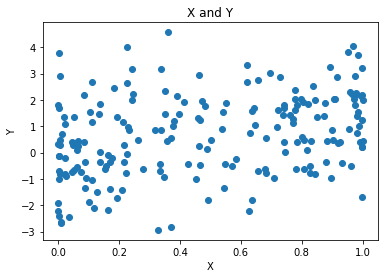

In [39]:
import numpy as np
import matplotlib.pyplot as plt
#Population data: A little bit of heteroschedasticity
N = 200
n = 20
beta1 = 0.5
beta2 = 0.5
I = 1000
import numpy as np
x = np.random.beta(beta1, beta2, size=N)
norm_uj = np.random.normal(0,1, size = N)
norm_epsilon_ij = np.random.normal(0,1, size = N)
vectorx = x
vectory = x + norm_uj + norm_epsilon_ij
# Plot
plt.scatter(vectorx, vectory)
plt.title('X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [40]:
# In this example we work on the variance of the \sum x / \sum y estimator
import pandas as pd
import random
import numpy as np
import pdb
import statistics
dataxy = pd.DataFrame({'ID': range(1, N + 1 ,1), 'x': vectorx, 'y': vectory}, columns=['ID', 'x', 'y'])
#data_list = list(dataxy['ID'])
original_sample = random.choices(list(dataxy['ID']), k = n)
b = 1
vectorAveBootstrap = 0
vectmeanbootnew = 0
vectvarboot1new = 0
vectstandboot1new = 0
currentbootstrapratio = [0] * I
bootstrapsample = np.zeros((n,1))
bootstrapsamplenew = np.zeros((n,1))
while(b<=I):
    bootstrapsample = random.choices(list(original_sample), k = n)
    bootstrapsamplenew = bootstrapsample
    #pdb.set_trace()
    currentbootstrapratio[b-1] = (sum(dataxy['y'][bootstrapsamplenew])/sum(dataxy['x'][bootstrapsamplenew]))
    b += 1
varbootestimate = statistics.variance(list(currentbootstrapratio))
varbootestimate

0.5103640869595409

# Bootstrap advantages
Bootstrapping offers a number of advantages:

- The bootstrap is quite general, although there are some cases in which it fails.


- Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data do not behave well or when the sample size is small.


- It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically (think about the median or the ratio statistic).


- It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples) provided that we are able to adjust it for allowing for dependence in the sampling plan.

# Distribution assumptions not met. Example on normality assumption violated

- Consider making inference on a mean $\mu$. Usually we take the sample mean $\bar{X}$ as a point estimate for $\mu$.


- To make inference on $\mu$ (for example to construct confidence intervals) we use the statistic $T=\frac {\bar{X}-\mu}{\frac {s}{\sqrt{n}}}$, where $s$ is the sample standard deviation and $n$ is the sample size.


- The assumption of normality of the data allows us to say that $T \sim t_{n-1}$, i.e. it is Student's $t$ with $n-1$ degrees of freedom.


- Without normality, we cannot assume that $T$ has this density!


- If this assumption is violated, we cannot make valid confidence intervals for $\mu$, nor run hypothesis tests on $\mu$ with a known error rate using our usual methods.


- The key fact in bootstrapping is that **the sample gives us a good representation of the population from which the sample comes from**: This is why we use the empirical distribution function (from the original sample) as a sort of 'population' and use the bootstrap samples to simulate the sampling distribution.

# Example: estimating the standard error of the mean

- Let $\mu_F=E_F (x)$ and $\sigma_F^2=\text{var}_F (x)= E_F [(x-\mu_F)^2]$ be the expectation and the variance of a cdf $F$, i.e. $X \sim (\mu_F, \sigma^2_F)$. 


- Let $s=(x_1, x_2, \dots, x_n)$ be a simple random sample of size $n$ extracted from $F$. 


- We know from basic statistics that the expected value and the variance of the sample mean $\bar{x}$ are $\mu_F$ and $\frac{\sigma^2_F}{n}$, respectively,  i.e. $\bar{X} \sim (\mu_F, \frac {\sigma^2_F}{n})$. 


- Now the *standard error* of the mean $\bar{X}$ is:
$$
\text{se}_F (\bar{X})=[\text{var}_F (\bar{X})]^{\frac{1}{2}}=\frac{\sigma_F}{\sqrt{n}}.
$$ 


- We expect $\bar{X}$ to be less that one standard error from $\mu_F$ about 68\% of the time, and less than two standard errors away from $\mu_F$ about 95\% of the time. 

- This is due to the central limit theorem when $n$ is big: $\bar{X} \sim N(\mu_F,\frac{\sigma_F^2}{n})$. 


- One of the advantages of the bootstrap is that we can afford not to use the central limit theorem.


# Example: estimating the standard error of the mean (cont.d)

- Having only a sample $s=(x_1, x_2, \dots, x_n)$ implies that we cannot use $\sigma_F^2$ for computing $\text{se}_F (\bar{x})$. 


- Therefore, we have to estimate it from the sample. 


- Using the plug-in principle, one customary solution from basic statistics is to use the sample variance:
$$
\hat{\sigma}^2=\sigma^2_{\hat{F}}=\frac{1}{n-1} \sum_{i=1}^n (x_i-\bar{x})^2.
$$ 
Therefore the standard error of $\bar{x}$ will be estimated by:
$$
\hat{\text{se}}(\bar{x})=\frac{\sigma_{\hat{F}}}{\sqrt{n}}.
$$ 


- If $n$ is sufficiently large one can use also: $$\hat{\sigma}^2=\sigma^2_{\hat{F}}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2.$$


# Example: estimating the standard error of the mean (cont.d)

- Now, we might perform a bootstrap estimate of the standard error in the following way. 


- Let $s=(x_1, x_2, \dots , x_n)$ be an $n$-sized *original random sample*. 


- As we have seen, a \emph{bootstrap sample} (called also a randomized or *resampled* version of the original sample) of size $n$ is a sample randomly selected with replacement from $\hat{F}$:
$$
s^*=(x_1^*, x_2^*, \dots , x_n^*).
$$ 


- Together with replications of the original sample we are interested in the (bootstrap) replication $\hat{\theta}^*$of the estimator $\hat{\theta}$
$$
\hat{\theta}^*=t(x_1^*, x_2^*, \dots , x_n^*).
$$ 


- With this setting, the bootstrap estimate of $\text{se}_F(\hat{\theta})$ is:
$$
\text{se}_{\hat{F}}(\hat{\theta}^*).
$$


# Example: estimating the standard error of the mean (cont.d)

- Draw an original random sample $s=(x_1, x_2, \dots x_n)$ of size $n$.


- For ($b$ in $1:B$):


- Select with replacement and independently a bootstrap sample $s^{*b}=(x_1^{*b}, x_2^{*b}, \dots, x_n^{*b})$ from the original sample $s$.


- Compute the bootstrap replication of the estimator: $\hat{\theta}^*(b)=t(x_1^{*b}, x_2^{*b}, \dots, x_n^{*b})$.
    
    
- Next $b$.
    
    
- End For.


- Estimate the standard error $\text{se}_F(\hat{\theta})$ by the sample standard deviation of the $B$ replications:
$$
\hat{se}_B=\{\frac{ \sum_{b=1}^B [\hat{\theta}^*(b)-\hat{\theta}^*(\cdot)]^2 }{B-1}\}^{\frac{1}{2}},
$$
where $\hat{\theta}^*(\cdot)=\frac{\sum_{b=1}^B  \hat{\theta}^*(b)}{B}$.


# Example: confidence intervals for $\rho$


- The sampling distribution of $r$, the sample correlation coefficient, can depart from normality.


- One of the classical solutions is due to Fisher who proposed the transformation:
$$z=\frac {1}{2}\ln \left( \frac {1+r}{1-r} \right).$$


- As $n$ increases $z$ becomes normal, so asymptotically we can use the r.v. $Z$ to obtain C.I. for $\rho$ after $z$ is back transformed to $r$.


- Fisher also showed that the standard error of $Z$ is $\frac {1}{\sqrt{n-3}}$, but $Z$ is slightly biased.


- So, especially with low values of $n$, the issue is not completely solved.

# Example: confidence intervals for $\rho$ (cont.d)

- Let's take the data contained in Efron & Tibshirani (1993).


- Data are average values for GPA and LSAT scores for students admitted to $n=15$ Law Schools (a random sampling of law schools). 


- (Grade Point Average (GPA) score is the grade point average of all grades from all current classes - Law School Admission Test (LSAT) is a half-day standardized test administered four times each year. Both are considered to enter university law faculties in the U.S.).

<img src="LawSchoolDataPlot.png">


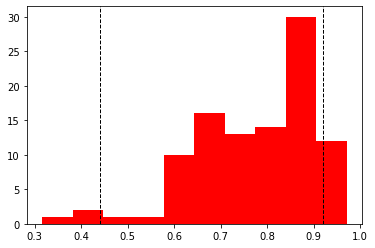

In [50]:
import random
import pandas as pd
import statistics
from scipy import stats 
import pdb
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('law.csv', sep=";")
#data = robjects.r('read.csv(file = "law.csv", header=TRUE, sep = ";")')
#data.columns = ['ID', 'GPA', 'LSAT']
#{'ID': range(1, N + 1 ,1), 'x': vectorx, 'y': vectory}, columns=['ID', 'x', 'y']
#dataDF = pd.DataFrame({'ID': data[1]}, columns=['ID'])
#print(data)
#robjects.r('n <- dim(law)[1]')
n = len(data)
B = 100

bootstrap_r_values = []
#robjects.r('bootstrap_r_values = rep(0,B)')

lista = []
calc = 0

while(calc < int(n)):
    lista.append(calc)
    calc = int(calc) + 1

for i in range(0,B):
    #pdb.set_trace()
    bootsample_indexes = random.choices(lista, k = n)
    LSAT = data['LSAT'][bootsample_indexes]
    GPA = data['GPA'][bootsample_indexes]
    bootstrap_r_values.append(stats.pearsonr(LSAT, GPA)[0])
#histogram of bootstrap r values with 20 bins and the confidence limits calculated with Fisher's z:

plt.hist(bootstrap_r_values, bins=10, color='red' ) # plotting histogram 
plt.axvline(0.44, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.92, color='k', linestyle='dashed', linewidth=1)
plt.show() 



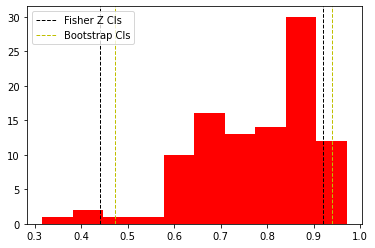

In [51]:
import numpy as np
import pylab
#Compute bootstrap c.i.
#To do this, compute 2.5% and 97.5% percentile of bootstrap distribution:
#First percentile:
perc1 = np.quantile(bootstrap_r_values, 0.025)
perc2 = np.quantile(bootstrap_r_values, 0.975)
plt.hist(bootstrap_r_values, bins=10, color='red' ) # plotting histogram 
plt.axvline(0.44, color='k', linestyle='dashed', linewidth=1, label='Fisher Z CIs')
plt.axvline(0.92, color='k', linestyle='dashed', linewidth=1)
plt.axvline(perc1, color='y', linestyle='dashed', linewidth=1, label='Bootstrap CIs')
plt.axvline(perc2, color='y', linestyle='dashed', linewidth=1)
pylab.legend(loc='upper left')
plt.show() 

# Using Python libraries

## The library "bootstrapped"



*bootstrapped* is a Python library that allows you to build confidence intervals from data. This is useful in a variety of contexts - including during ad-hoc a/b test analysis.

In [52]:
#Classical bootstrap in Python
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# take 1k 'samples' from the larger population
samples = np.array(bootstrap_r_values)[:15]

print(bs.bootstrap(samples, stat_func=bs_stats.mean))

print(bs.bootstrap(samples, stat_func=bs_stats.std))


0.8259910445746144    (0.7913898378094911, 0.85989653272456)
0.06715027497860995    (0.04969359958263571, 0.09123438422573947)


## Example from pypi project

- Imagine we own a website and think changing the color of a ‘subscribe’ button will improve signups. 


- One method to measure the improvement is to conduct an A/B test where we show 50% of people the old version and 50% of the people the new version. 


- We can use the bootstrap to understand how much the button color improves responses and give us the error bars associated with the test - this will give us lower and upper bounds on how good we should expect the change to be!

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

## Bootstrap Examples

Bootstrap at a high level: The bootstrap lets you resample a numeric series to (typically) estimate confidence intervals.

In [54]:
# little a/b test
# score in test are 10% greater than ctrl (per record)
# ctrl has 5x the number of records as test

# 10% lift in test
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10000) * 1.0
ctrl = np.random.binomial(100, p=0.2, size=50000) * 1.0

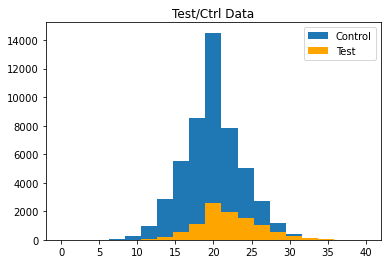

In [55]:
bins = np.linspace(0, 40, 20)

plt.hist(ctrl, bins=bins, label='Control')
plt.hist(test, bins=bins, label='Test', color='orange')
plt.title('Test/Ctrl Data')
plt.legend()

In [56]:
# run an a/b test simulation ignoring the lengths of the series (average)
# just what is the 'typical' value
# use percent change to compare test and control

print(bs_compare.percent_change(test.mean(), ctrl.mean()))

print(bs.bootstrap_ab(test, ctrl, bs_stats.mean, bs_compare.percent_change))

10.112462896441961
10.112462896441961    (9.659991615356562, 10.558236855725752)


In [57]:
print(len(test))
print(len(ctrl))

10000
50000


In [58]:
# run an a/b test simulation considering the lengths of the series (sum)
# consider the full 'volume' of values that are passed in

print(bs_compare.percent_change(test.sum(), ctrl.sum()))

print(bs.bootstrap_ab(
    test, 
    ctrl, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.percent_change
))

-77.9775074207116
-77.9775074207116    (-78.06674747936542, -77.88777705977054)


**Advice**: For most situations we reccomend that we use 'sum' aggregate function as this will take the size of the population into account. This can be useful if you think your test will increase the total number of individuals in the population and not only the typical value per individual.

Exception to the above advice

There are situations where you might need to make some adjustments, for example if your holdouts are sized differently.

- You give 100 dollars to **person_A** and you give 1000 dollars to **person_B** to bring people to your store
- Say you don't know how many people person_A or person_B went after but they did each get paying customers to attend
- However you do need to correct at the end for the fact that you gave person_B 10x more money than person_A

In [59]:
# Gave $100, got 1k events on the store, $20 per event 
person_A_results = np.random.binomial(100, p=0.2, size=1000) * 1.0

# Gave $1000, got 5k events on the store, $30 per event
person_B_results = np.random.binomial(100, p=0.3, size=5000) * 1.0

In [60]:
# The test earned much less in terms of total dollars
print(bs.bootstrap_ab(
    person_A_results, 
    person_B_results, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.difference,
))

-129660.0    (-130355.0, -128962.95)


In [61]:
# The test gives ~$10 less per event
print(bs.bootstrap_ab(
    person_A_results, 
    person_B_results, 
    stat_func=bs_stats.mean,
    compare_func=bs_compare.difference,
))

-9.9816    (-10.262815000000002, -9.704)


In [62]:
# If we scale the text by $$ spent - person_A should be a better return on investment
#  - assuming person_A can achieve similar results with 10x more money
print(bs.bootstrap_ab(
    person_A_results, 
    person_B_results, 
    stat_func=bs_stats.sum,
    compare_func=bs_compare.difference,
    scale_test_by=10.,
))

49782.0    (47204.975, 52309.025)


 # Reasons to apply the bootstrap in regression contexts

- Distributional assumptions (above all, normality) not met. 


- Presence of outliers.


- Data set sizes too small.


- Heteroskedasticity.

 # Bootstrap for regression models (Method 1)

- The procedures previously seen can be easily extended to regression models. The most straightforward approach is to collect the response-variable value and regressors for each observation:
$$
\mathbf{z}_i^{'}=[Y_i, X_{i1}, \dots X_{ip}].
$$


- Then a way to extend the bootstrap in regression models can be the following:

    - The original sample $s= \left[\mathbf{z}_1^{'},\mathbf{z}_2^{'}, \dots, \mathbf{z}_n^{'}\right]$ can be resampled with replacement $B$ times, obtaining bootstrap samples $s^*_b= \left[\mathbf{z}_{b1}^{*'},\mathbf{z}_{b2}^{*'}, \dots, \mathbf{z}_{bn}^{*'}\right]$, $b=1, \dots , B$.

    - For each of this bootstrap samples, perform an OLS estimation and obtain regression coefficient estimates $\boldsymbol{\beta}^*_b=[\beta_{b0}^*, \beta_{b1}^*, \dots , \beta_{bp}^*]^{'}$.

    - Use these $B$ estimates to compute biases, standard errors, confidence intervals, etc. of regression coefficient estimates.


 # Bootstrap for regression models (Method 1) (cont'd)

- An important problem of the previous setting is that we treat the $X$s as **stochastic regressors** (which is a possibility not usually contemplated by linear model classical assumptions, but still an important possibility; see, for example, Frees, 2004. 


- To avoid this and treat the regressors as fixed (like, for example, in experimental design), we can use the so-called *residual bootstrap*, which consists on bootstrapping regression residuals rather than the entire original sample.

 # Bootstrap for regression model (Method 2): The residual bootstrap

The residual bootstrap works as follows:

1. Estimate $\hat{\beta}_0, \hat{\beta}_1, \dots , \hat{\beta}_p$ for the original sample, and calculate the fitted value and residual for each observation:
\begin{equation*}
\begin{split}
&\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1 x_{i1} + \dots +\hat{\beta}_p x_{ip}\\
&e_i=y_i- \hat{y}_i.
\end{split}
\end{equation*}


2. From the original sample of residuals $e_i$ select with replacement bootstrap samples of residuals of the form $\boldsymbol{e}^*_b=[e_{b1}^*, e_{b2}^*, \dots , e_{bn}^*]^{'}$, and, from these bootstrap samples, calculate bootstrapped values $\mathbf{y}_b^*=[y_{b1}^*, y_{b2}^*, \dots , Y_{bn}^*]^{'}$, with $y_{bi}^*=\hat{y}_i+ e_{bi}^*$.


3. Regress the bootstrapped $Y$ values on the fixed $X $values to obtain bootstrap regression coefficients. For example, if estimates are calculated via OLS, then $\boldsymbol{\beta}^*_b=(\mathbf{X}^{'}\mathbf{X})^{-1}\mathbf{X}^{'}\mathbf{y}_b^*$, for $b=1,2, \dots , B$.


4. Use the $B$ bootstrap estimates $\boldsymbol{\beta}^*_b$ to construct bootstrap standard errors, confidence intervals, etc. for regression coefficients.


 # First conclusion: pros and cons of bootstrapping

Some of the advantages and disadvantages of the bootstrap method are the following:

1. Only need the software that does weighted estimation.


2. No need for programming specific estimators for each model.


3. No need to release the unit identifiers in public data sets.


4. No need to give formal assumptions and hypotheses.


5. (Still) Computationally intensive.


6. Problems in detecting outlier data.
 



 # Assignment in class (or to be continued at home)

Use data set 'Anscombe.xls'.

1. Perform a simple linear regression analysis using 'education' as response variable either in R (using lm()) or in Python (using, for example, linear_model from sklearn or OLS from statsmodels.api, or other methods). Choose one independent variable among the three available.


2. Find a way to give confidence intervals for $\beta_1$.


3. Implement a bootstrap routine (Method 1) to get confidence intervals for $\beta_1$.


4. Compare the results.





# An example of a (popular but potentially wrong) application of the bootstrap in finance


- Problem: estimation of the risk and reward of an asset over a long-run horizon given a short-run set of observations. 


- People use the bootstrap method to do this. 


- More worrying, they use the classical (standard) bootstrap, which is supposed to work well in an *independence* data structure. 


-  An important modification, called the **moving-block bootstrap** can overcome this problem to work better than the classical bootstrap when serial dependency is present in the data.


-  We will see very briefly an example on the application of bootstrap methods to financial data (Cogneau \& Zakamouline, 2013).


# Estimating the log return


- Setting:
    - A time interval $[t,T]$.
    - Time interval divided into $n$ equally spaced subintervals of length $\Delta t$ ($n=\frac{T-t}{\Delta t}$).
    - At time $t_k=t+k\Delta t, k=0,1,\dots, n$ we observe the value of a risky asset $P(t_k)$.
    - The one-period log return of this asset during interval $k$ is $x_k=\log (\frac{P(t_k)}{P(t_{k-1)}})$.
    - Then, our original sample will be $(x_1, x_2, \dots, x_n)$.


- The problem will be to estimate the parameter $\theta(F_m)$, where $F_m$ is is the probability distribution of log return over $m$ successive intervals, i.e. the probability distribution of:
$$
x_{k,k+m}=\log(\frac{P(t_{k+m-1})}{P(t_{k-1)}}) \sim F_m.
$$


# Application of the classical bootstrap to the log return problem


-  The classical bootstrap method is applied to the original sample $(x_1, x_2, \dots, x_n)$ of log returns, obtaining with replacement bootstrap samples $(x_1^*, x_2^*, \dots, x_n^*)$.


- Sometimes the with-replacement bootstrap samples are of dimension $m$ rather than $n$: $(x_1^*, x_2^*, \dots , x_m^*)$ since the focus is on the $m$-period horizon.


- Then, one computes $B$ times the bootstrap $m$-period return:
$$
x^*_{t,t+m}=\sum_{k=1}^m x_k^*.
$$


- In this way, one obtains the bootstrap probability distribution $F_m^*$ of the real $F_m$ of log returns over a period of $m$.


- $F_m^*$ is used to compute the bootstrap estimate of the parameter of interest $\theta(F_m)$.

# Application of the classical bootstrap to the log return problem (cont'd)


-  Since the independence constraint is required for the standard bootstrap, if we have, for example:
$$
y_t=y_{t-1}+ \epsilon_t,
$$
where $\epsilon \sim N(\mu, \sigma^2)$, and they are uncorrelated, i.e. we have a random walk model, we can compute differences of the time series values, assuming that they are independent:
$$
\epsilon_t=y_t-y_{t-1},
$$
and bootstrap them.


# The log return problem: A toy example


- *Data*. Twelve stock prices (from March 14th, 2018 to March 29th, 2018) of Sony Corporation (SNE) (from Yahoo Finance):


*50.95, 51.34, 50.64, 48.34, 48.83, 48.69, 48.13, 47.89, 48.67, 47.87, 48.08, 48.34*.


- *Hypothesis*: $\epsilon_i \sim N(-0.24,0.73)$.


- *Statistic of interest*. Maximum drawdown (difference between a peak and a trough in a given period):


*3.47*.


- *Differences* are:


*0.39, -0.70, -2.30, 0.49, -0.14, -0.56, -0.24, 0.78, -0.80, 0.21, 0.26*.


- Example of *bootstrapped differences*:


*-0.14, -0.24, 0.21, -0.70, -0.14, -0.14, 0.49, -0.70, -2.30, 0.78, 0.49*.


- Example of *bootstrap replicate* (by summing differences):


*50.95, 50.81, 50.57, 50.78, 50.08, 49.94, 49.80, 50.29, 49.59, 47.29, 48.07*.


- *Replicate of statistic of interest*. Maximum drawdown: 3.66*.

# Bootstrap universe: spaghetti-type plot

<img src="Figure1.png">



# The block bootstrap method


- Due to dependence between the financial observations, the standard bootstrap method might give biased results because simple random resampling might not capture the structure of the data. 


- The block bootstrap (Hall, 1985) tries to avoid this. 


- The idea is that we resample *blocks of data*, hoping that within blocks structure is preserved. 


- Let $l$ and $b$ be integers such that $bl=n$, i.e. the sample $(x_1,x_2, \dots , x_n)$ is divided into $b$ *blocks* of length $l$. 


- In the non-overlapping block version the original sample is divided among $b$ disjoint blocks, where the $k$-th block is: $B_k=(x_{(k-1)\cdot l+1}, x_{(k-1)\cdot l+2}, \dots , x_{kl})$. 


- For example if we have a monthly series with length one year, we have $n=12$. Suppose you want quarterly blocks, i.e. blocks of length $l=3$.  Then we have:

$$
\begin{split}
& B_1 = (x_1, x_2, x_3)\\
& B_2 = (x_4, x_5, x_6)\\
& B_3 = (x_7, x_8, x_9)\\
& B_4 = (x_{10}, x_{11}, x_{12}).
\end{split}
$$


# Application of the moving block bootstrap method


- The moving block bootstrap works if the structure between blocks is (quasi) i.i.d. 


- In the moving block method, the original sample is divided into $n-l+1$ overlapping blocks, and the $k$-th block is given by: $B_k=(x_{k}, x_{k+1}, \dots , x_{k+l-1})$. 


- In the example above with $n=12$, suppose you want overlapping blocks of length $l=5$.  Then we have:
$$
\begin{split}
& B_1 = (x_1, x_2, x_3, x_4, x_5)\\
& B_2 = (x_2, x_3, x_4, x_5, x_6)\\
& B_3 = (x_3, x_4, x_5, x_6, x_7)\\
& B_4 = (x_4, x_5, x_6, x_7, x_8)\\
& B_5 = (x_5, x_6, x_7, x_8, x_9)\\
& B_6 = (x_6, x_7, x_8, x_9, x_{10})\\
& B_7 = (x_7, x_8, x_9, x_{10}, x_{11})\\
& B_8 = (x_8, x_9, x_{10}, x_{11}, x_{12}).
\end{split}
$$


# Bootstrap samples in the non-overlapping and the moving block methods


- In both cases, once you have set $N$ equal to $b$ or $n-l+1$ depending on if you are using non-overlapping or moving block bootstrap, respectively, you pick at random and with replacement block $(B^*_1, B_2^*, \dots, B_b^*)$, from the original blocks $(B_1, B_2; \dots, B_N)$. The bootstrap sample will be:
$$
X^*=(B_1^*,B_2^*,, \dots, B_b^*)
$$


- As usual with the bootstrap, you take a large number of these bootstrap samples to construct the required probability distribution.


# Other bootstrap methods relating to the moving block bootstrap


- *Circular block bootstrap* (Politis \& Romano, 1992; Shao \& Yu, 1993). This method allows blocks which start at the end of the data to wrap around to the start.


- *Double block bootstrap* (Kunsch, 1989). This method allows two levels of blocking.


- *Stationary block bootstrap* (Politis \& Romano, 1994). This method allows the length of the block to be random.


# Some useful references for the block bootstrap (available on the internet)


- Cogneau, P., Zakamouline, Z. (2010). Bootstrap Methods for Finance: Review and Analysis. Draft paper, University of Liege.


- Radovanov, B., Marcikić, A. (2014). A comparison of four different block bootstrap methods. *Croatian Operational Research Review*, 5: 189-202.


- Sunesson, A. (2014). *Bootstrap of Dependent Data in Finance*. Master of Science's Thesis, Chalmers University of Technology, Sweden.


# General references for the bootstrap and the block bootstrap


- Chernick, M.R., LaBudde, R.A. (2011). *An introduction to Bootstrap Methods with Applications to R*. Wiley.


- Cogneau, P., Zakamouline, V. (2013).  Block bootstrap methods and the choice of stocks for the long run. 
*Quantitative Finance*, 13(9), 1443-1457.


- Efron, B. (1979). Bootstrap methods: Another look at the jackknife. *Annals of Statistics*, 7: 1-26.


- Efron, B., Tibshirani, R.J. (1994). *An Introduction to the Bootstrap*, CRC Press.


- Hall, P. (1985). Resampling a coverage pattern. *Stochastic processes and their Applications*, 20, 231-246. 


- McCarthy, P. J. (1969). Pseudo-replication: Half samples. *Review of the International Statistical Institute*, 37 (3), 239-264.


- Politis, D. N., Romano, J. P. (1992). A circular block resampling procedure for stationary data. In Lepage, R., Billard, L. (Eds.): *Exploring the Limits of Bootstrap*: 263-270. Wiley, New York. 


- Politis, D. N., Romano, J. P. (1994). The stationary bootstrap. *Journal of the American Statistical Association*, 89: 1303-1313.



## A few words about other resampling methods: The jackknife method

- Another important resampling method is the **jackknife**.


- The jackknife was proposed by Quenouille (1954) then revised by Tukey (1958). 


- It is a method aiming mainly at *estimating the bias* and the *standard error* of an estimator. 


- Suppose we have a sample $s=(x_1, x_2, \dots , x_n)$ and an estimator $\hat{\theta}=t(s)$. 


- The jackknife focuses on the samples that \emph{leave out one observation at a time}:
$$
s_{(i)}=(x_1, x_2, \dots , x_{i-1}, x_{i+1}, \dots , x_n).
$$ 


- For $i=1, \dots , n$, these samples are called \textbf{jackknife samples}.



## Pseudo-values and the Jackknife estimate of the bias


- The quantity $\theta_{(i)}$ which is calculated on the jackknife sample is called \emph{pseudo-value}. 


- The jackknife procedure is iterated $n$ times on each of the $n$ available jackknife samples, obtaining $n$ pseudo-values $\theta_{(i)}$, $i = 1,\dots, n$. 


- The $n$ pseudo-values can be interpreted as a simulation of the distribution of the estimator $\hat {\theta}$
such that the average:
$$
\hat {\theta}_{*}=\frac{1}{n} \sum_{i=1}^n \theta_{(i)}
$$
can be regarded as a simulation - called \emph{jackknife estimate} - of the expected value $E[\hat{\theta}]$. 


- The jackknife estimate of the bias of $\hat{\theta}$ is therefore given by:
$$
\hat{\text{Bias}}_{jack}  = (n-1)[\hat {\theta}_{*}-\hat{\theta}].
$$


- $(n-1)$ is a weight as in the jackknife lower sample sizes are considered with respect to the original sample size.


## The jackknife estimate of the bias for the sample mean estimator


- For the sample mean estimator ($\bar{x}$, which is itself unbiased) the jackknife estimate of the bias is zero.


- Let $\theta = \mu$ and $\hat{\theta} = \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$.


- We have:
$$
\hat{\theta}_{(i)} = \frac{1}{n-1} \sum_{j \neq i} x_j = \frac{1}{n-1}[\sum_{j = 1}^n x_j -x_i] = \frac{n\bar{x}}{n-1}- \frac{x_i}{n-1}.
$$


- Now:
$$
\hat {\theta}_{*}= \frac{1}{n} \sum_{i = 1}^n \hat{\theta}_{(i)} = \frac{1}{n} (\frac{n^2\bar{x}}{n-1}- \frac{nx_i}{n-1}) = \frac{n\bar{x}}{n-1} - \frac{\bar{x}}{n-1} = \bar{x}.
$$


- Therefore:
$$
\hat{Bias}_{jack} = (n-1)[\hat {\theta}_{*}-\hat{\theta}] = (n-1)(\bar{x} - \bar{x}) = 0.
$$


- This result can be extended to all sample moments and to linear functions of sample moments.


## The jackknife estimate of the bias $\hat{Bias}_{jack}$ is suitable for "correcting" the bias of $\hat{\theta}$


- It turns out that the jackknife-corrected estimator $\hat{\theta}_{jack-corr}$:
$$
\hat{\theta}_{jack-corr} = \hat{\theta} - \hat{Bias}_{jack} = \hat{\theta} - (n-1)[\hat {\theta}_{*}-\hat{\theta}] = n\hat{\theta} - (n-1)\hat {\theta}_{*}
$$
is actually \textbf{less biased} than $\hat{\theta}$ if the bias of $\hat{\theta}$ can have the following representation:
$$
E(\hat{\theta}) - \theta = \frac{a_1}{n} + \frac{a_2}{n^2} + \dots + \frac{a_k}{n^k},
$$
i.e. the bias is of order $O(\frac{1}{n})$.


- In this case the jackknife-corrected estimator has lower bias\emph{}.



## The jackknife estimate of the bias $\hat{Bias}_{jack}$ is suitable for "correcting" the bias of $\hat{\theta}$ (cont'd)


- In fact we have:
$$
E(\hat{\theta}_{jack-corr}) =  E[n\hat{\theta} - (n-1)\hat {\theta}_{*}] = nE(\hat{\theta})- (n-1) E(\hat {\theta}_{n-1}).
$$


- By using the representation we saw in the last slide we have:
$$
E(\hat{\theta}_{jack-corr}) = n[\theta + \frac{a_1}{n} + \frac{a_2}{n^2} + \dots ] - (n-1)[\theta + \frac{a_1}{n-1} + \frac{a_2}{(n-1)^2} + \dots ],
$$
and after a few algebra we finally get:
$$
E(\hat{\theta}_{jack-corr}) = \theta + \frac{a_2}{n(n-1)} + \dots,
$$
i.e. the bias of $\hat{\theta}_{jack-corr}$ is of order $O(\frac{1}{n^2})$, with therefore an improvement.



## The jackknife estimate of the bias $\hat{Bias}_{jack}$ is suitable for "correcting" the bias of $\hat{\theta}$ (cont'd)


- The fact we have just proved is true for a wide family of estimators, i.e. the Maximum Likelihood Estimators.


- An example is the sample variance which is a biased estimator of the population variance of the first order.


- Here the jack-corrected estimator is \emph{unbiased}. In fact we have:
$$
\hat{\theta} = s^2 = \frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2.
$$


- Its expected value is:
$$
E(s^2)=\frac{n-1}{n} \sigma^2 = \sigma^2 - \frac{\sigma^2}{n},
$$
and therefore here we have a bias of the first order. But:
$$
\hat{\theta}_{jack-corr} = \bar{s}^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i-\bar{x})^2,
$$
and we get an unbiased estimator of the variance. %ie $E(\bar{s}^2 ) = \sigma^2$.


## The jackknife estimate of the standard error


- The jackknife estimator of the standard error for $\hat{\theta}$ is defined by:
$$
\hat{\text{se}}_{\text{jack}}=\left[\frac{n-1}{n}\sum_{i=1}^n \left(\hat{\theta}_{(i)} - \hat{\theta}_{(\cdot)}\right)^2\right]^\frac{1}{2},
$$
where $\hat{\theta}_{(i)}=t(s_{(i)})$ and $\hat{\theta}_{(\cdot)}= \sum_{i=1}^n \frac{\hat{\theta}_{(i)}}{n}$.
\item In the formula there is an "inflation factor" $\frac{n-1}{n}$ which is used because the jackknife deviations $\left(\hat{\theta}_{(i)} - \hat{\theta}_{(\cdot)}\right)^2$ tend to be smaller than the bootstrap deviations $\left(\hat{\theta}^*(b) - \hat{\theta}^*(\cdot)\right)^2$.


- If $\hat{\theta}=\bar{x}$ we get: 
$$
\hat{\text{se}}_{\text{jack}}= \left[ \frac{\sum _{i=1}^n(x_i-\bar{x})^2}{n(n-1)} \right]^{\frac{1}{2}}.
$$


In [63]:
#Original sample from a uniform (0,1) - size:10
size = 10
from scipy.stats import uniform
or_sample = uniform.rvs(size=size)
or_sample

array([0.47556795, 0.41468764, 0.11400007, 0.5711369 , 0.4600779 ,
       0.41195148, 0.18272764, 0.61370105, 0.02194724, 0.16370906])

In [64]:
import numpy as np
  
# Here 4 is the number of rows and 2 
# is the number of columns
jack_samples = np.zeros((size, size -1))
jack_samples

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:
arr = np.array([1, 2, 3, 4, 5])
index = 0
arr = np.delete(arr, index)
print(arr)

[2 3 4 5]


In [66]:
for i in range(0, size):
    index = i
    jack_samples[i,] = np.delete(or_sample, i)
jack_samples

array([[0.41468764, 0.11400007, 0.5711369 , 0.4600779 , 0.41195148,
        0.18272764, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.11400007, 0.5711369 , 0.4600779 , 0.41195148,
        0.18272764, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.41468764, 0.5711369 , 0.4600779 , 0.41195148,
        0.18272764, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.41468764, 0.11400007, 0.4600779 , 0.41195148,
        0.18272764, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.41468764, 0.11400007, 0.5711369 , 0.41195148,
        0.18272764, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.41468764, 0.11400007, 0.5711369 , 0.4600779 ,
        0.18272764, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.41468764, 0.11400007, 0.5711369 , 0.4600779 ,
        0.41195148, 0.61370105, 0.02194724, 0.16370906],
       [0.47556795, 0.41468764, 0.11400007, 0.5711369 , 0.4600779 ,
        0.41195148, 0.18272764, 0.02194724, 0.16370906],


## Using a Python library

- We can use the library Astropy from which we invoke jackknife_stats

In [67]:
import numpy as np
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats

In [68]:
birtweight = np.array([3.401,3.204,3.629,3.487,3.062,3.856,3.912,3.742,4.054])
birtweight

array([3.401, 3.204, 3.629, 3.487, 3.062, 3.856, 3.912, 3.742, 4.054])

In [69]:
jack_samples = jackknife_resampling(birtweight)
jack_samples

array([[3.204, 3.629, 3.487, 3.062, 3.856, 3.912, 3.742, 4.054],
       [3.401, 3.629, 3.487, 3.062, 3.856, 3.912, 3.742, 4.054],
       [3.401, 3.204, 3.487, 3.062, 3.856, 3.912, 3.742, 4.054],
       [3.401, 3.204, 3.629, 3.062, 3.856, 3.912, 3.742, 4.054],
       [3.401, 3.204, 3.629, 3.487, 3.856, 3.912, 3.742, 4.054],
       [3.401, 3.204, 3.629, 3.487, 3.062, 3.912, 3.742, 4.054],
       [3.401, 3.204, 3.629, 3.487, 3.062, 3.856, 3.742, 4.054],
       [3.401, 3.204, 3.629, 3.487, 3.062, 3.856, 3.912, 4.054],
       [3.401, 3.204, 3.629, 3.487, 3.062, 3.856, 3.912, 3.742]])

### Obtain Jackknife estimate for the mean, its bias, its standard error, and its 95% confidence interval:

In [70]:
estimator = np.mean

In [71]:
jack_estimate, jack_bias, jack_se, jack_conf_interval = jackknife_stats(birtweight, estimator, 0.95)

In [72]:
print(jack_estimate)
print(jack_bias)
print(jack_se)
print(jack_conf_interval)

3.5941111111111113
0.0
0.11107548039814652
[3.37640717 3.81181505]


In [77]:
import numpy as np
import pdb
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n1 = len(x)
    #pdb.set_trace()
    idx = np.arange(n1)
    #pdb.set_trace()
    return np.sum(func(x[idx!=i]) for i in range(n1))/float(n1)

In [78]:
import numpy as np
# Jackknife estimate of standard deviation
x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

<ipython-input-77-3d4a5892ef58>:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(func(x[idx!=i]) for i in range(n1))/float(n1)


2.0637809287868234

In [83]:
def jackknife_var(x, func):
    #"""Jackknife estimate of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

In [84]:
jackknife_var(x, np.std)

<ipython-input-77-3d4a5892ef58>:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(func(x[idx!=i]) for i in range(n1))/float(n1)
<ipython-input-83-470b281f97f2>:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0


0.024684246869127135

# Other popular use of resampling methods you probably  have already seen


- Cross validation is itself a resampling method.


- In bagging bootstrap is used to reduce variance into the node groups.


- In random forest we use the bootstrap for reducing the correlation among trees.



# Using the recombinator package

- This example is taken from the Python manual page https://pypi.org/project/recombinator/ for the recombinator package
 

- You can find also examples on applying the block bootstrap to time series

In [86]:
pip install recombinator

     |████████████████████████████████| 126 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 1.8 MB/s eta 0:00:011
     |████████████████████████████████| 53 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 4.9 MB/s eta 0:00:01
  Created wheel for contexttimer: filename=contexttimer-0.3.3-py3-none-any.whl size=5818 sha256=c92cf910c37598476dfc486a67b0e6d21a9045b130a936f43bab728358a68a5f
  Stored in directory: /Users/giancarlomanzi/Library/Caches/pip/wheels/70/dd/09/4924e45dc5912f71b971b6790958b5e82f88c9db95a7cb4969
Successfully built contexttimer
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [88]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from recombinator.iid_bootstrap import iid_bootstrap

In [93]:
#generating random values
n=100
np.random.seed(1)
x = np.abs(np.random.randn(n))

In [94]:
x

array([1.62434536, 0.61175641, 0.52817175, 1.07296862, 0.86540763,
       2.3015387 , 1.74481176, 0.7612069 , 0.3190391 , 0.24937038,
       1.46210794, 2.06014071, 0.3224172 , 0.38405435, 1.13376944,
       1.09989127, 0.17242821, 0.87785842, 0.04221375, 0.58281521,
       1.10061918, 1.14472371, 0.90159072, 0.50249434, 0.90085595,
       0.68372786, 0.12289023, 0.93576943, 0.26788808, 0.53035547,
       0.69166075, 0.39675353, 0.6871727 , 0.84520564, 0.67124613,
       0.0126646 , 1.11731035, 0.2344157 , 1.65980218, 0.74204416,
       0.19183555, 0.88762896, 0.74715829, 1.6924546 , 0.05080775,
       0.63699565, 0.19091548, 2.10025514, 0.12015895, 0.61720311,
       0.30017032, 0.35224985, 1.1425182 , 0.34934272, 0.20889423,
       0.58662319, 0.83898341, 0.93110208, 0.28558733, 0.88514116,
       0.75439794, 1.25286816, 0.51292982, 0.29809284, 0.48851815,
       0.07557171, 1.13162939, 1.51981682, 2.18557541, 1.39649634,
       1.44411381, 0.50446586, 0.16003707, 0.87616892, 0.31563

In [95]:
percentile = 75
original_statistic = np.percentile(x, percentile)
print(original_statistic)

0.9322689195424352


In [99]:
R = 10
x_resampled = iid_bootstrap(x, replications=R)

In [100]:
x_resampled

array([[1.25286816, 0.51292982, 0.53035547, 0.88514116, 0.52817175,
        0.90085595, 0.31563495, 0.2344157 , 0.67066229, 0.69166075,
        1.6924546 , 0.18656139, 1.44411381, 1.10061918, 0.41005165,
        1.12948391, 0.75439794, 1.44411381, 1.1425182 , 0.86540763,
        0.63873041, 0.42349435, 0.86540763, 0.41005165, 1.13376944,
        0.51292982, 0.7612069 , 0.7612069 , 0.12015895, 1.10061918,
        0.18656139, 0.52817175, 0.20075807, 2.02220122, 0.35224985,
        0.37528495, 0.04359686, 0.34934272, 0.39675353, 0.28558733,
        0.19091548, 0.35224985, 0.86540763, 1.07296862, 0.90085595,
        0.52817175, 0.69166075, 0.20889423, 0.26788808, 0.93576943,
        0.88762896, 0.74204416, 1.65980218, 0.90159072, 0.41005165,
        0.39675353, 0.17242821, 0.86540763, 1.6924546 , 0.39675353,
        0.42349435, 0.22232814, 0.68372786, 0.0126646 , 1.6924546 ,
        0.48851815, 0.48851815, 0.04359686, 0.39675353, 0.50249434,
        0.75439794, 1.14472371, 0.87616892, 0.90

In [101]:
resampled_statistic = np.percentile(x_resampled, percentile, axis=1)

In [102]:
from recombinator.statistics import \
    estimate_confidence_interval_from_bootstrap, \
    estimate_standard_error_from_bootstrap

In [103]:
estimate_standard_error_from_bootstrap(bootstrap_estimates=resampled_statistic,
                                       original_estimate=original_statistic)

0.1038211174960798

In [104]:
estimate_confidence_interval_from_bootstrap(bootstrap_estimates=resampled_statistic, 
                                            confidence_level=95)

(0.8793190344442463, 1.122989343504645)